In [40]:
import pandas as pd 
import seaborn as sns 
import warnings 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings('ignore')

In [4]:
medical_insurance=pd.read_csv('medical_insurance.csv')
medical_insurance.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [5]:
medical_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [6]:
medical_insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
# BMI 와 보험료 상관관계 분석 

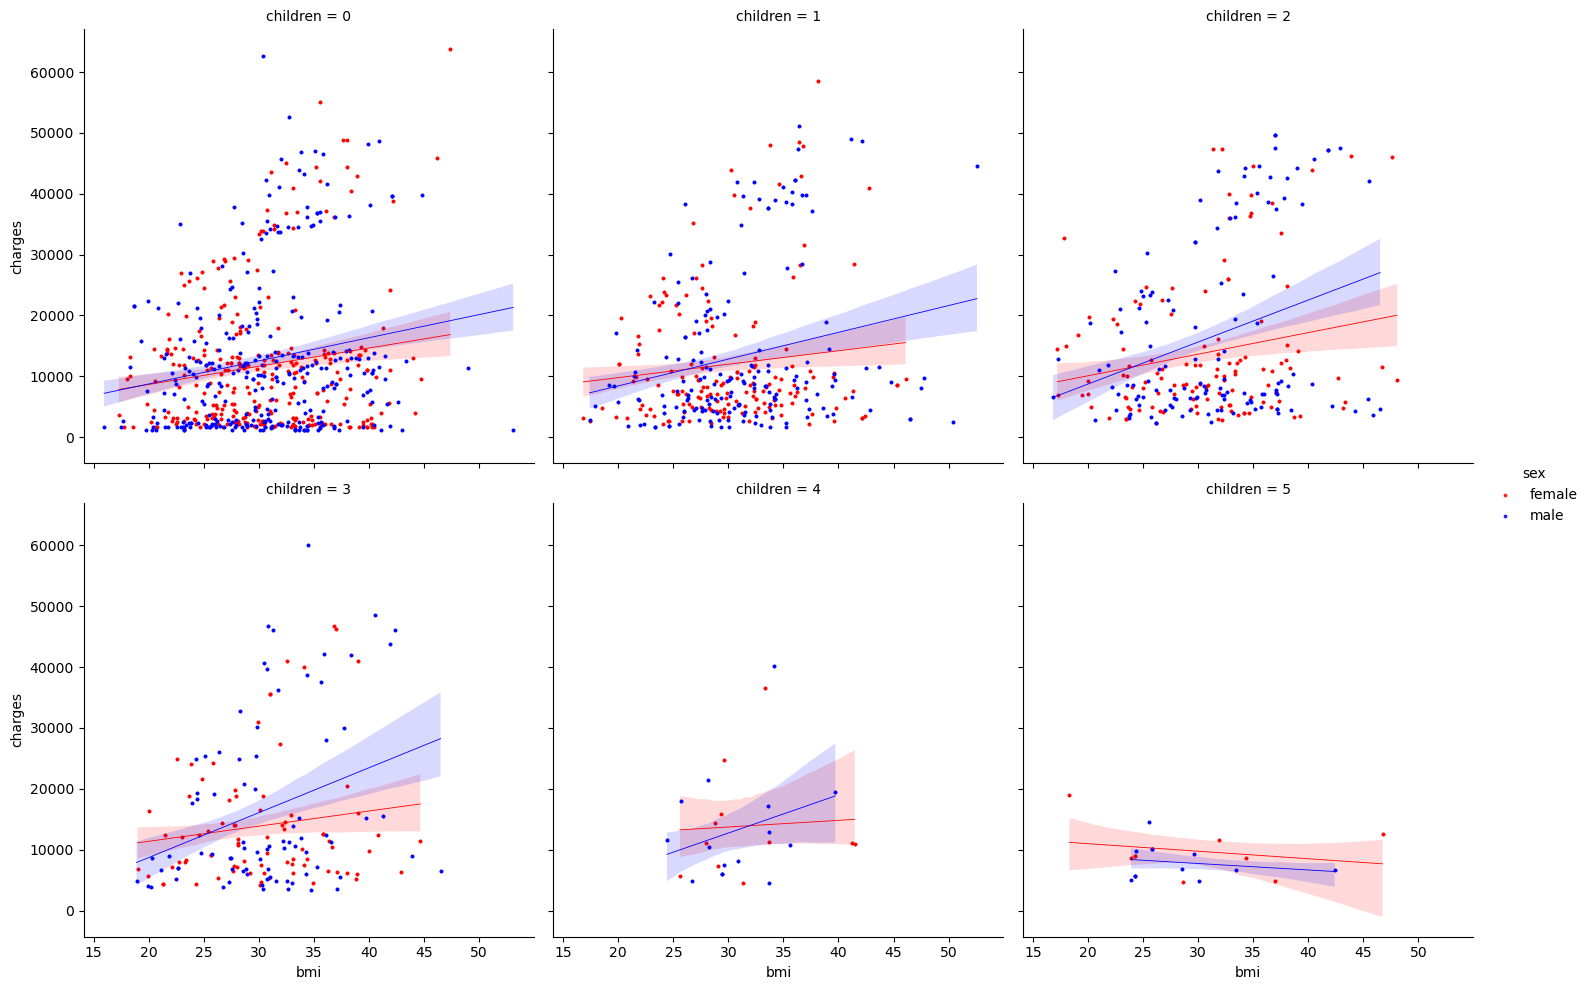

In [12]:
sns.lmplot(
    data=medical_insurance,
    x='bmi',
    y='charges',
    hue='sex',
    col='children',
    col_wrap=3,
    scatter_kws={'s':3},
    palette={'male':'b', 'female':'r'},
    line_kws={'lw':0.6}
)

<Axes: xlabel='charges', ylabel='smoker'>

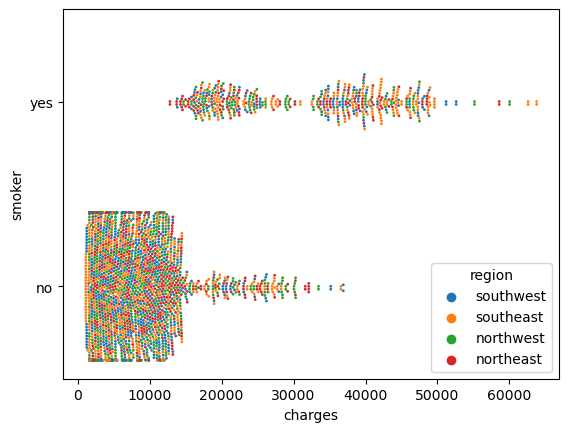

In [17]:
sns.swarmplot(
    data=medical_insurance,
    x='charges',
    y='smoker',
    hue='region',
    size=2
)

<Axes: xlabel='bmi', ylabel='charges'>

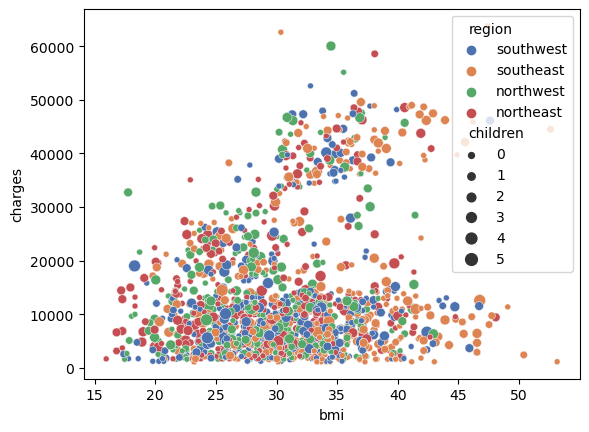

In [18]:
sns.scatterplot(
    data=medical_insurance,
    x='bmi',
    y='charges',
    hue='region',
    palette='deep',
    size='children',
)

In [22]:
np.sort(medical_insurance['age'].unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

In [33]:
def get_age_10s(age):
    if age<20:
        return 'teens'
    elif age<30:
        return 'twenties'
    elif age<40:
        return 'thirties'
    elif age<50:
        return 'forties'
    elif age<60:
        return 'fifties'
    elif age<70:
        return 'sixties'
    else:
        return -1

In [35]:
medical_insurance.insert(2,'10s_age_en', medical_insurance['age'].apply(get_age_10s))

In [36]:
medical_insurance

,age,10s_age,10s_age_en,sex,bmi,children,smoker,region,charges
0,19,10,teens,female,27.900,0,yes,southwest,16884.92400
1,18,10,teens,male,33.770,1,no,southeast,1725.55230
2,28,20,twenties,male,33.000,3,no,southeast,4449.46200
3,33,30,thirties,male,22.705,0,no,northwest,21984.47061
4,32,30,thirties,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
2767,47,40,forties,female,45.320,1,no,southeast,8569.86180
2768,21,20,twenties,female,34.600,0,no,southwest,2020.17700
2769,19,10,teens,male,26.030,1,yes,northwest,16450.89470
2770,23,20,twenties,male,18.715,0,no,northwest,21595.38229


In [27]:
medical_insurance.nunique()

age           47
10s_age        6
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<Axes: xlabel='bmi', ylabel='10s_age_en'>

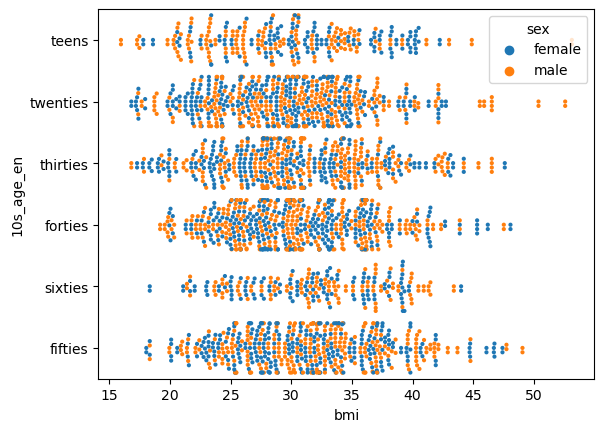

In [39]:
sns.swarmplot(
    data=medical_insurance,
    x='bmi',
    y='10s_age_en',
    hue='sex',
    size=3,
    #dodge=True
)

In [44]:
smoker_data=medical_insurance['smoker'].value_counts()

In [45]:
type(smoker_data)

pandas.core.series.Series

In [50]:
smoker_data=smoker_data.to_dict()

In [57]:
pie_data=list(smoker_data.values())
pie_data

[2208, 564]

In [60]:
pie_labels=list(smoker_data.keys())
pie_labels

['no', 'yes']

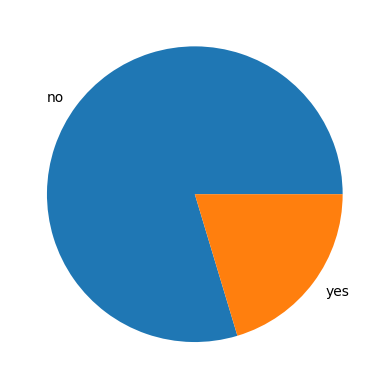

In [62]:
plt.pie(pie_data,labels=pie_labels,)
plt.show()

<Axes: xlabel='children', ylabel='Count'>

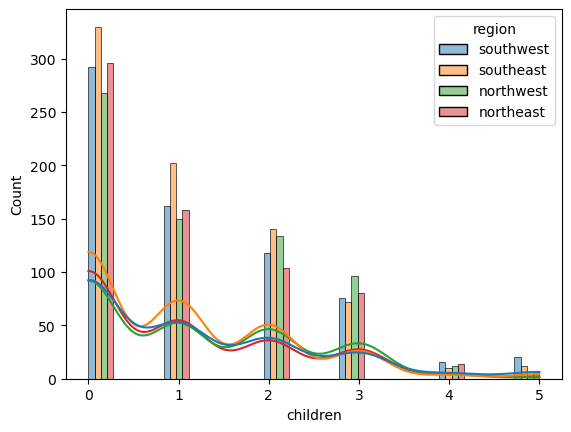

In [69]:
sns.histplot(
    data=medical_insurance,
    x='children',
    hue='region',
    multiple='dodge',
    kde=True
)

<Axes: xlabel='age', ylabel='Count'>

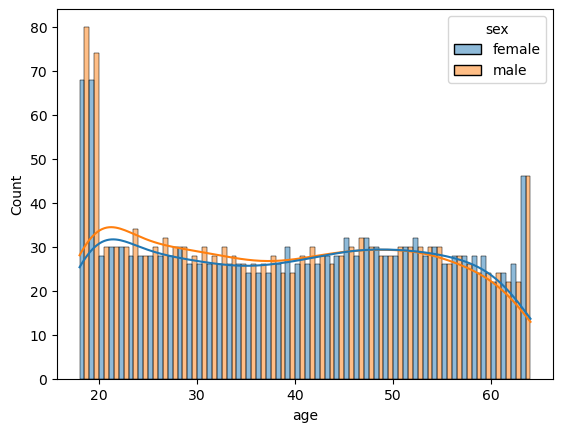

In [68]:
sns.histplot(
    data=medical_insurance,
    x='age',
    binwidth=1,
    hue='sex',
    multiple='dodge',
    kde=True
)

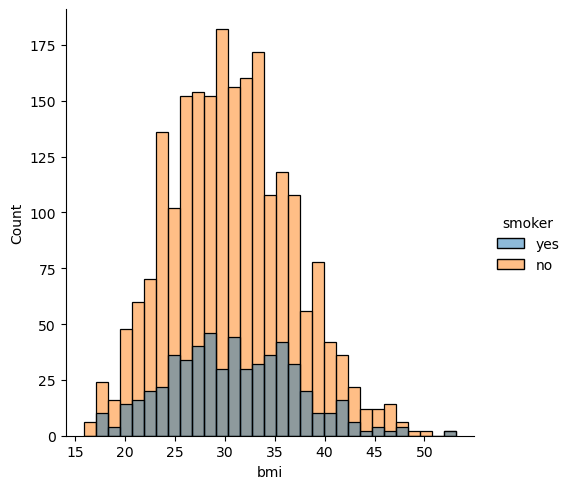

In [70]:
sns.displot(
    data=medical_insurance,
    x='bmi',
    hue='smoker',
)